In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.ar_model import AR
import copy

In [7]:
#question1
snp = pd.read_csv('snp_500_2015_2019.csv') 
snp.set_index(['Date'], inplace=True)
logsnp = snp['Close'].to_frame().apply(np.log)

<Figure size 576x288 with 0 Axes>

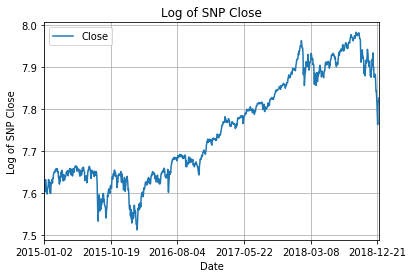

In [8]:
plt.figure(figsize=(8,4))
snp_close.plot()
plt.title("Log of SNP Close")  
plt.xlabel("Date")  
plt.ylabel("Log of SNP Close")  
plt.grid()
plt.savefig("logsnp")
plt.show()

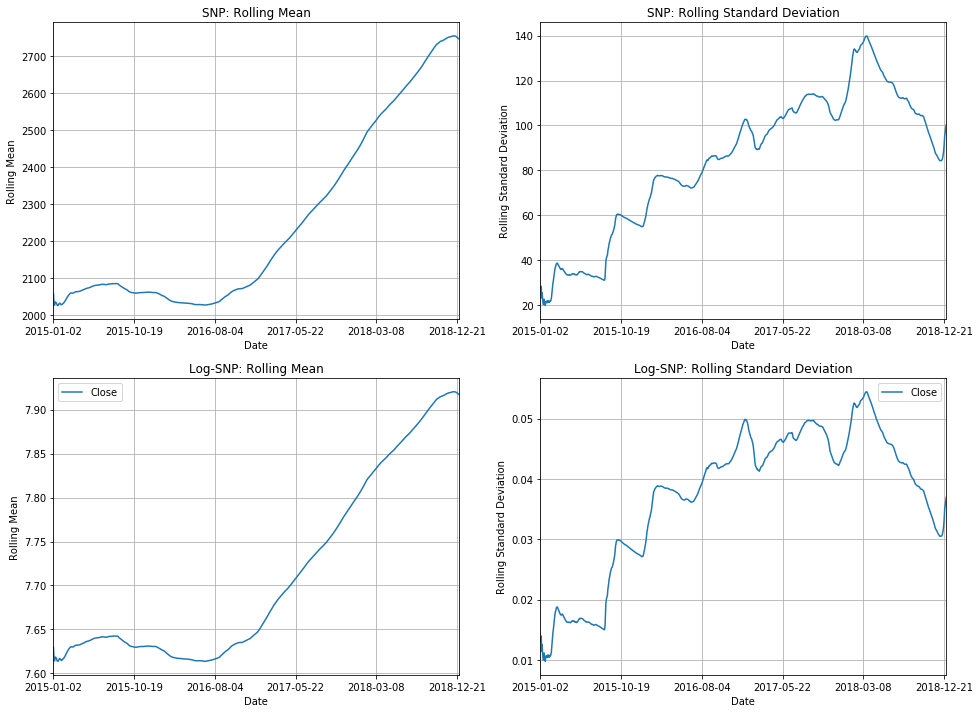

In [10]:
logsnp_rolling_mean = logsnp.rolling(252, min_periods=1).mean()
logsnp_rolling_std = logsnp.rolling(252, min_periods=1).std()
snp_rolling_mean = snp["Close"].rolling(252, min_periods=1).mean()
snp_rolling_std = snp["Close"].rolling(252, min_periods=1).std()
# px_rolling_std.index = px["date"]
# px_rolling_mean.index = px["date"]

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

snp_rolling_mean.plot(ax = ax1) 
ax1.set_title("SNP: Rolling Mean")  
ax1.set_xlabel("Date")  
ax1.set_ylabel("Rolling Mean")  
ax1.grid()

snp_rolling_std.plot(ax = ax2)
ax2.set_title("SNP: Rolling Standard Deviation")  
ax2.set_xlabel("Date")  
ax2.set_ylabel("Rolling Standard Deviation")  
ax2.grid()

logsnp_rolling_mean.plot(ax = ax3) 
ax3.set_title("Log-SNP: Rolling Mean")  
ax3.set_xlabel("Date")  
ax3.set_ylabel("Rolling Mean")  
ax3.grid()

logsnp_rolling_std.plot(ax = ax4)
ax4.set_title("Log-SNP: Rolling Standard Deviation")  
ax4.set_xlabel("Date")  
ax4.set_ylabel("Rolling Standard Deviation")  
ax4.grid()
plt.savefig("snp_rolling")

In [11]:
def stationarity_test(timeseries, info = False):
    '''Augmented Dickey-Fuller test for stationarity'''
    from statsmodels.tsa.stattools import adfuller
    df_test = adfuller(timeseries, autolag = "AIC")
    df_list = [df_test[0],df_test[1]<0.05,df_test[1],df_test[2],df_test[3]]
    df_output = pd.Series(df_list, index = ["Test Statistic", 
                                              "Stationarity",
                                              "p-value", 
                                              "Number of Lags Used",
                                              "Number of Observations Used"
                                             ])
    
    if(info):
        print("Results of Dickey-Fuller Test:")
        print(df_output)
        
    return df_output

In [21]:
stationarity_test(snp_close["Close"])

Test Statistic                 -1.21388
Stationarity                      False
p-value                        0.667598
Number of Lags Used                   0
Number of Observations Used        1005
dtype: object

In [22]:
stationarity_test(logsnp["Close"])

Test Statistic                 -1.21388
Stationarity                      False
p-value                        0.667598
Number of Lags Used                   0
Number of Observations Used        1005
dtype: object

In [64]:
#question2&3
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
arma_model = ARIMA(snp_arma, order=(1, 0, 0))
results_arma = arma_model.fit()
snp_arma['Res'] = results_arma.resid 
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']

snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ['True']
arima_model = ARIMA(snp_arima, order=(1, 1, 0))
results_arima = arima_model.fit()
snp_arima['Res'] = results_arima.resid
snp_arima['Prediction'] = snp_arima['True'] - snp_arima['Res']

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


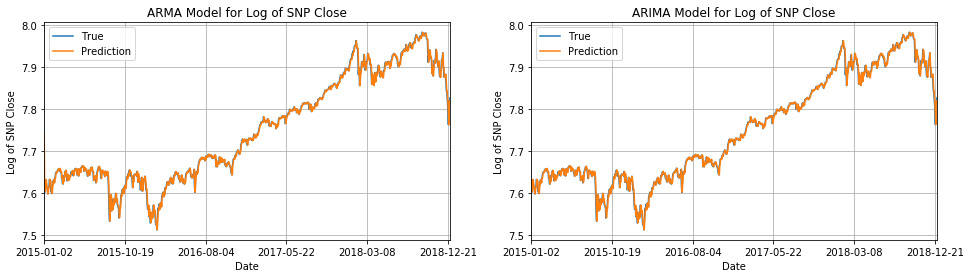

In [25]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
snp_arma["True"].plot(label = "True", ax = ax1)
snp_arma["Prediction"].plot(label = "Prediction", ax = ax1)
plt.title("ARMA Model for Log of SNP Close")  
plt.xlabel("Date")
plt.ylabel("Log of SNP Close") 
plt.legend()
plt.grid()

ax2 = fig.add_subplot(122)
snp_arima["True"].plot(label = "True", ax = ax2)
snp_arima["Prediction"].plot(label = "Prediction", ax = ax2)
plt.title("ARIMA Model for Log of SNP Close")  
plt.xlabel("Date")
plt.ylabel("Log of SNP Close") 
plt.legend()
plt.grid()

plt.savefig("ARMA_ARIMA")

In [66]:
results_arma.params

const         7.739997
ar.L1.True    0.997359
dtype: float64

In [65]:
results_arima.params

const           0.000196
ar.L1.D.True   -0.008752
dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(snp_arma['True'], snp_arma['Prediction'])

8.627169574539054e-05

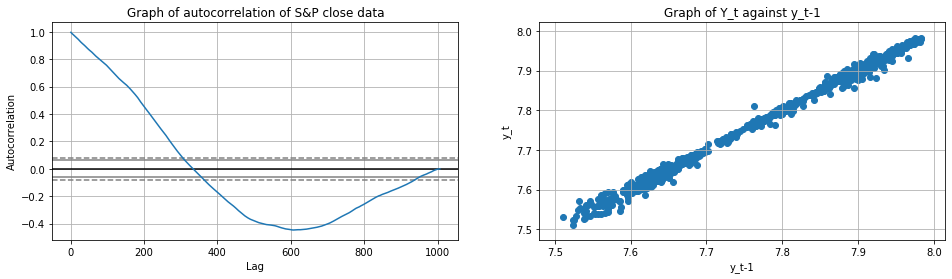

In [67]:
y_t = snp_close['Close'][1:]
y_t_1 = snp_close['Close'][:-1]

fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
pd.plotting.autocorrelation_plot(snp_close, ax = ax1)
plt.title('Graph of autocorrelation of S&P close data')

ax2 = fig.add_subplot(122)
ax2.scatter(y_t_1, y_t)
plt.ylabel('y_t')
plt.xlabel('y_t-1')
plt.title('Graph of Y_t against y_t-1')
plt.grid()

plt.savefig("ytcorrelation")

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(snp_arima['True'][1:], snp_arima['Prediction'][1:])

7.42831085653003e-05

In [43]:
type(k)

matplotlib.axes._subplots.AxesSubplot